Sandbox case to test out construction, writing and parsing of RC model objects

**nodes** are automatically interpreted as **states** with a `state_type` and thermal capacitance $C$.

**edges** are interpreted as **resistances** between two states and have a resistance $R$.

Each node can have a fixed temperature condition. The label `T_fix` points to the parameter name of the temperature boundary. A limited number of choices is available, such as `'T_e'` or `'T_g'`. `modesto` should automatically link these labels to the correct data input. (are other fixed temperatures necessary? Don't believe so).

If the temperature is fixed, the heat flows don't need to be interpreted anymore.

Each node can also have one or multiple heat influxes, together with a multiplication factor. I think the easiest way to implement this is again to have a limited set of heat inflow labels (such as one for internal gains in day zone, one for night zone, one for solar gains, ... ?). 

<img src='sandboxRC.png'>

In [1]:
import networkx as nx

In [2]:
G = nx.Graph()

In [3]:
G.add_node('A', C=1000, state_type='day', heat_source={'Q_sol': 0.05})
G.add_node('B', C=500, state_type='floor', heat_source={'Q_int': 0.3})
G.add_node('C', C=2000, state_type='night', heat_source={'Q_int': 0.7})

# Fixed temperature boundary
G.add_node('Te', T_fix='T_e')

In [4]:
G.add_edge('A', 'B', R=100)
G.add_edge('B', 'C', R=50)

G.add_edge('Te', 'B', R=150)

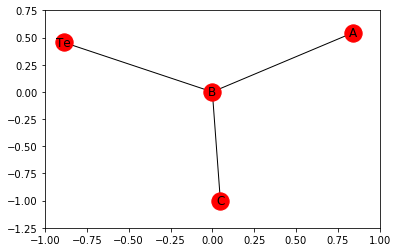

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline
nx.draw_networkx(G)

In [6]:
import networkx.readwrite as json_netw

In [7]:
json_dict = json_netw.node_link_data(G)

In [8]:
import json

In [9]:
with open('testJSON.json', 'w') as f:
    f.write(json.dumps(json_dict, indent=4))

In [10]:
with open('testJSON.json') as r:
    readjson = json.loads(r.read())

In [11]:
H = json_netw.node_link_graph(readjson)

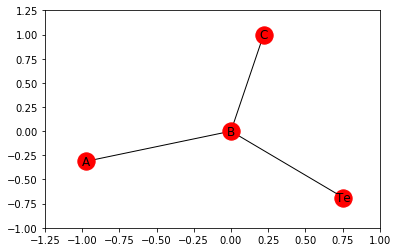

In [12]:
nx.draw_networkx(H)

In [13]:
H.nodes

NodeView((u'A', u'C', u'B', u'Te'))

In [14]:
H.edges()

EdgeView([(u'A', u'B'), (u'C', u'B'), (u'B', u'Te')])

In [15]:
for node in H.nodes():
    print node

A
C
B
Te


In [16]:
nx.get_node_attributes(H, 'T_fix')

{u'Te': u'T_e'}

In [17]:
nx.get_edge_attributes(H, 'R')

{(u'A', u'B'): 100, (u'B', u'Te'): 150, (u'C', u'B'): 50}

In [18]:
H.nodes['A']

{u'C': 1000, u'heat_source': {u'Q_sol': 0.05}, u'state_type': u'day'}

In [19]:
for node in H:
    print H.nodes[node]

{u'state_type': u'day', u'C': 1000, u'heat_source': {u'Q_sol': 0.05}}
{u'state_type': u'night', u'C': 2000, u'heat_source': {u'Q_int': 0.7}}
{u'state_type': u'floor', u'C': 500, u'heat_source': {u'Q_int': 0.3}}
{u'T_fix': u'T_e'}


In [20]:
for node in H:
    for neighb in H.neighbors(node):
        print node, neighb

A B
C B
B A
B C
B Te
Te B


In [24]:
H.edges[('A', 'B')]['R']

100

In [25]:
H.edges[('B', 'A')]['R']

100